# Week 5 - Examples




##  Solve the following differential equation using scipy

dy/dx = 0.4 + sin(2.3*x)

over the domain [0,10], subject to the initial condition y(0) = 0


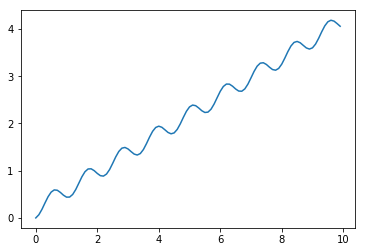

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt 

# define ODE
def d(Y,x):
    return 0.4 + np.sin(5.6*x)

# main program
xs = np.arange(0,10,0.1)   # x values to evaluate the integrated function

Y = odeint( d, 0, xs )     # integrate the function using odeint

plt.plot(xs,Y[:,0])
plt.show()

##  Integrate the following function using scipy

y = sin(x)

over the domain[0,10]

In [5]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt 

(value,err) = quad(np.sin, 0, 10) 
print("Integrated Value: ", value)
print("Error:", err)


Integrated Value:  1.8390715290764525
Error: 9.921183292055902e-12


## Solve a system of linear equations


$ 2x_1 + 3x_2 + 6x_3 = 4 $

$ x_1 - 3x_2 - 9x_3 = -11 $

$ 8x_1 + 5x_2 -7x_3 = 1 $

or, expressed in matrix form:

$ A = \begin{pmatrix}2 & 3 & 6\\ 1 & -3 & -9 \\  8 & 5 & -7 \end{pmatrix}, 
x = \begin{pmatrix} x_1 \\ x_2 \\  x_3  \end{pmatrix},
b = \begin{pmatrix} 4 \\ -11 \\  1  \end{pmatrix} $

In [6]:
import numpy as np
from scipy.linalg import solve

A = np.array([[2, 3, 6], [1, -3, -9], [8, 5, -7]])
b = np.array([4, -11, 1])

solve(A,b)


array([-2.75675676,  4.01801802, -0.42342342])

## Find the Minimum of a Polynomial Function.

Specifically, write a program the finds the minimum of $ y = 12x + 2x^2 $.  Use the scipy.optimize.minimize_scalar() function.  

Plot the function over the domain x=[-10,10].  Add an additional point to the plot indicating the location of the minima.  Lebal the plot appropriately.

Minimum of the function occurs at (-3.00,-18.00)
True


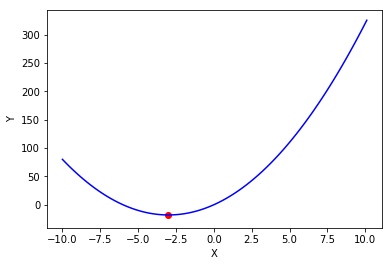

In [8]:
import numpy as np
from scipy.optimize import minimize_scalar

def Fn(X):
    return 12*X + 2*X*X


# main – find minimum of cost function
result = minimize_scalar( Fn )

# report results
xMin = result.x
print( "Minimum of the function occurs at ({:.2f},{:.2f})".format( xMin,Fn(xMin) ) )
print( result.success)
# plot
xs = np.linspace(-10,10.1,100)
ys = Fn(xs)

plt.plot(xs,ys, color='blue')
plt.scatter(xMin, Fn(xMin), color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Optimize the size of a cylindrical can

You want to optimize the dimensions of a **cylindrical can** can, where "optimal" means "**minimizes cost of materials**".

The can consists of a side (cylinder) and two ends (circles).  The cost of materials for the sides is \$0.10/m2,
and for the ends $0.10/m2.  Find the can dimensions that minimizes the cost.

Use `scipy.optimize.minimize_scalar()`

Final: R=11.68 cm, H=23.35 cm, Cost=$0.03


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply


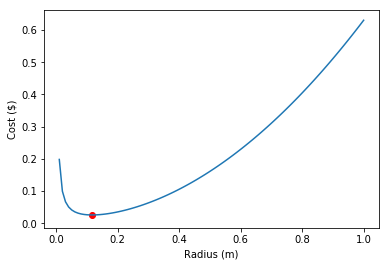

In [11]:
import numpy as np
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt

# optimize cost of a cylindrical can

costEnds = 0.10     # $/m2
costSides = 0.10    # $/m2
volume = 0.01       # m3 (1 liter)

def Cost(r):
    areaEnd = np.pi*r*r
    if np.sum(areaEnd) == 0:
        return 10000
    
    h = volume/areaEnd
    areaSide = h * 2*np.pi*r
    cost = areaEnd*costEnds*2 + areaSide*costSides
    #print( "R={:.2f}, H={:.2f}, Cost={:.2f}".format( r,h,cost) )
    return cost

# find minimum, using 1 as initial guess
result = minimize_scalar(Cost)
rOpt = result.x
hOpt = volume / (np.pi*rOpt*rOpt)
cost = Cost(rOpt)
cmPerM = 100
print( "Final: R={:.2f} cm, H={:.2f} cm, Cost=${:.2f}".format( rOpt*cmPerM,hOpt*cmPerM,cost) )# plot results

# plot results
rs = np.linspace(0,1,100)
ys = Cost(rs)

plt.plot(rs,ys)
plt.scatter(rOpt,Cost(rOpt),color='red')
plt.xlabel("Radius (m)")
plt.ylabel("Cost ($)")
plt.show()


## Linear Regression using scipy

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# start by loading a dataset from a CSV file
data = pd.read_excel( 'http://explorer.bee.oregonstate.edu/Topic/Modeling/Data/ETrf.xlsx' )

# parse out the dota column into arrays
xObs = data[ 'Day' ]               # extract x observations (independent variable)
yObs = data[ 'Site1' ]             # extract y observations (dependent variable)

# run regression
slope, intercept, r_value, p_value, std_err = stats.linregress(xObs,yObs)
print( "linregress: Slope:", slope, "  Intercept:",  intercept, "   R-value=", r_value**2 )

xModeled = np.linspace( xObs.min(), xObs.max(), 50 )    # generate array of sampled x values
yModeled = intercept + slope *xModeled

# plot the data
plt.plot(xObs,yObs,'or', label="Site 1 Observations" )   # add observation series
plt.plot( xModeled, yModeled, '-', color='blue', label="Modeled", linewidth=3 )    ## add modeled series

plt.title( "Observed vs Predicted ET Fraction - Site 1")
plt.legend(loc='lower left')
plt.xlabel( "Day")
plt.ylabel( "ETRf")
plt.show()

## Nonlinear regression - curve_fit()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def TheModel(Day,a0,a1,a2):
    return a0 + a1*Day + a2*Day*Day

# start by loading a dataset from a CSV file
data = pd.read_excel( 'http://explorer.bee.oregonstate.edu/Topic/Modeling/Data/ETrf.xlsx' )

# parse out the dota column into arrays
xObs = data[ 'Day' ]               # extract x observations (independent variable)
yObs = data[ 'Site1' ]             # extract y observations (dependent variable)

# run regression

(a0,a1,a2),_ = curve_fit( TheModel, xObs, yObs, p0=(1,1,1) )

print( "curve_fit:", a0,a1,a2 )

xModeled = np.linspace( xObs.min(), xObs.max(), 50 )    # generate array of sampled x values
yModeled = a0 + a1*xModeled + a2*xModeled*xModeled

# plot the data
plt.plot(xObs,yObs,'or', label="Site 1 Observations" )   # add observation series
plt.plot( xModeled, yModeled, '-', color='blue', label="Modeled", linewidth=3 )    ## add modeled series

plt.title( "Observed vs Predicted ET Fraction - Site 2")
plt.legend(loc='lower left')
plt.xlabel( "Day")
plt.ylabel( "ETRf")
plt.show()